# Model Evaluation – Customer Churn Prediction

This notebook evaluates the trained SVM model using standard classification metrics.


In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)


In [2]:
X = pd.read_csv("../data/processed/X.csv")
y = pd.read_csv("../data/processed/y.csv").squeeze()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


In [4]:
model = joblib.load("../models/model.pkl")


In [5]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Precision: 1.0
Recall: 0.9562841530054644
F1 Score: 0.9776536312849162

Classification Report:

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.96      0.98       183

    accuracy                           0.96       200
   macro avg       0.84      0.98      0.89       200
weighted avg       0.97      0.96      0.96       200



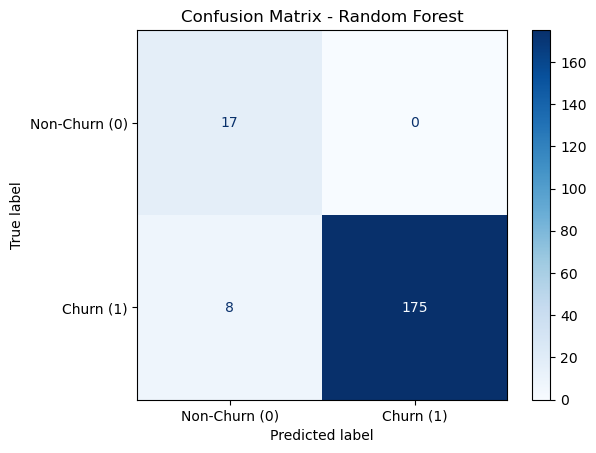

In [7]:
cm = confusion_matrix(y_test, y_pred)

# Display as heatmap / matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Churn (0)", "Churn (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

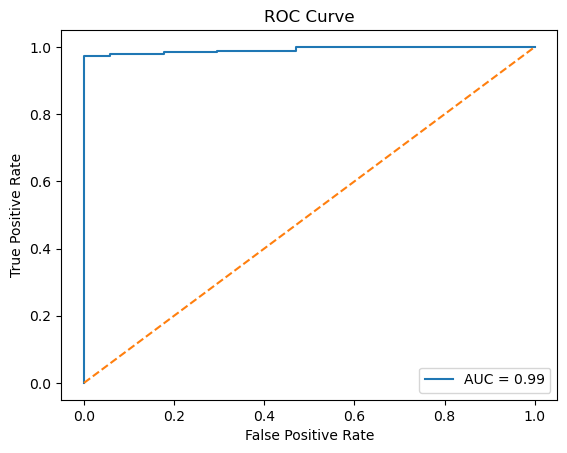

In [8]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Evaluation Summary

The model was evaluated on a held-out test set using standard classification metrics.
Results indicate good predictive performance and class separability, making the model
suitable for customer churn prediction.
